In [4]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def random_polynomial_2d(degree, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    # Generate random coefficients for the polynomial
    coefficients = np.random.randn(degree + 1, degree + 1)
    
    return coefficients

def evaluate_polynomial(coefficients, x, y):
    degree = coefficients.shape[0] - 1
    z = np.zeros_like(x)
    for i in range(degree + 1):
        for j in range(degree + 1):
            z += coefficients[i, j] * (x ** i) * (y ** j)
    return z

def get_plot(figsize=(4,2)):
    degree = 3
    seed = 12
    coefficients = random_polynomial_2d(degree, seed)

    # Create a grid of x and y values
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    x, y = np.meshgrid(x, y)
    z = evaluate_polynomial(coefficients, x, y)

    # Create a custom colormap
    colors = ['forestgreen', 'thistle']
    cmap = ListedColormap(colors)

    # Create a binary mask
    mask = z > 0

    # Plot the heatmap and contour
    f,ax = plt.subplots(figsize=figsize)
    ax.imshow(mask, extent=(-10, 10, -10, 10), origin='lower', cmap=cmap, alpha=0.6)
    # ax.imshow(mask, origin='lower', cmap=cmap, alpha=0.6)

    ax.scatter([0.62],[2.06],marker='+',s=150,c='forestgreen')
    contour = ax.contour(x, y, z, levels=[0], colors='white')
    ax.clabel(contour, fmt='%2.1f', colors='white')

    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.axis('off')

    f.tight_layout()
    return f,ax 

# f,ax = get_plot()

<IPython.core.display.Javascript object>


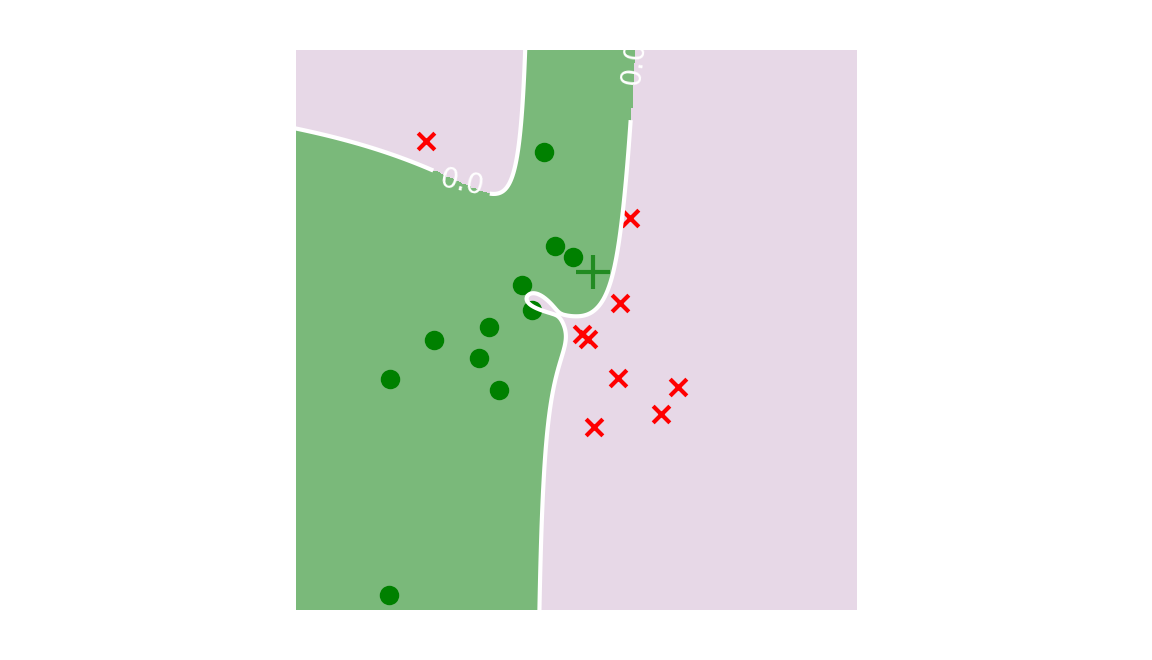

In [5]:
# step 1: sample some instances (s is for sample)
n_samples = 20
xs = 3*np.random.randn(n_samples)
ys = 3*np.random.randn(n_samples)

degree = 3
seed = 12
coefficients = random_polynomial_2d(degree, seed)

zs = evaluate_polynomial(coefficients, xs, ys)

f,ax = get_plot()
ax.scatter(xs[zs>0],ys[zs>0],c='red',marker='x')
ax.scatter(xs[zs<0],ys[zs<0],c='green',marker='o')

<IPython.core.display.Javascript object>


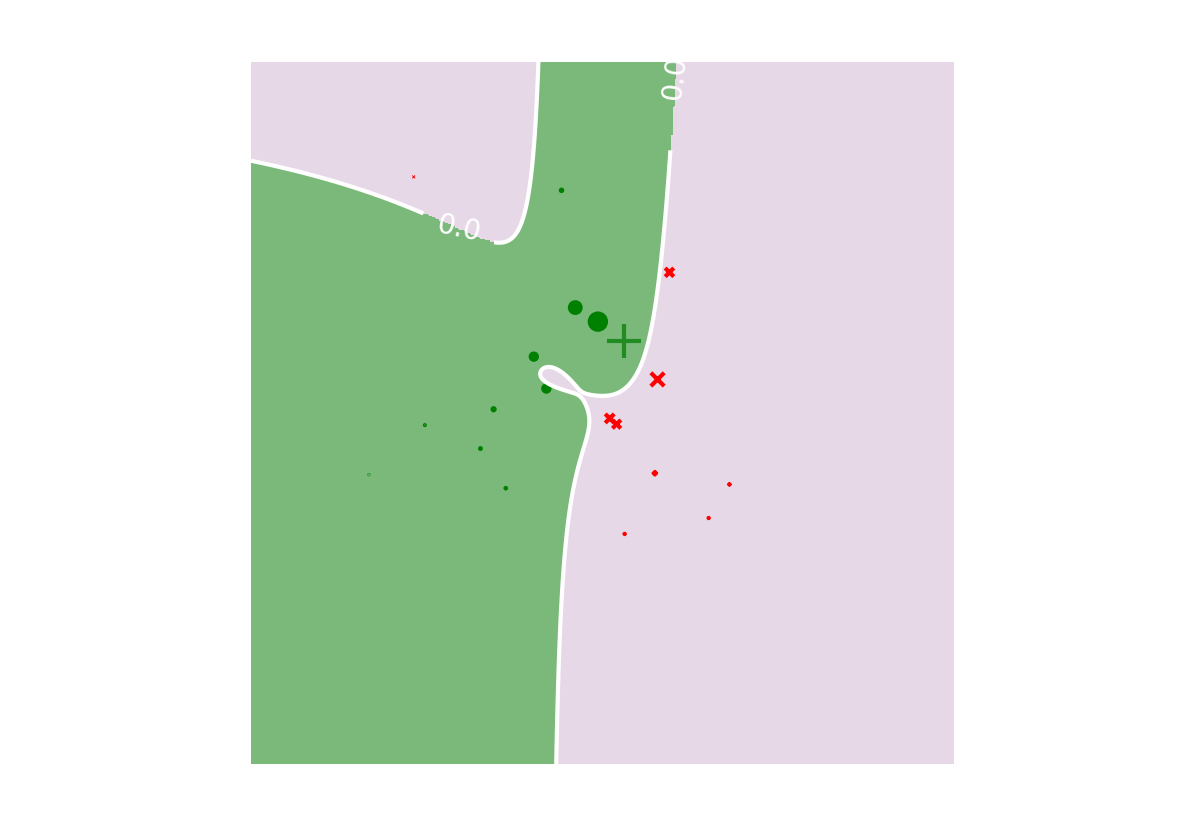

In [15]:
# get the weights 
explain_point = np.array([0.62,2.06])
sample_weights = 1/ np.exp(np.linalg.norm(explain_point-np.vstack((xs,ys)).T,axis=1))
# sample_weights = np.ones(len(xs))
f,ax = get_plot()
scale=100
ax.scatter(xs[zs>0],ys[zs>0],c='red',marker='x',s=scale* sample_weights[zs>0])
ax.scatter(xs[zs<0],ys[zs<0],c='green',marker='o',s=scale* sample_weights[zs<0])



In [16]:
# now, we need to learn a classifier which is locally faithful to the true model
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=17)

# define the data 
X_train = np.vstack((xs,ys)).T
y_train = zs>0

# fit the model
classifier.fit(X_train, y_train, sample_weight = sample_weights)

# Get the coefficients (weights) of the linear SVM
weights = classifier.coef_[0]
intercept = classifier.intercept_[0]

print(f'The weights of each feature are: {weights}')

The weights of each feature are: [ 0.67181638 -0.52109721]


<IPython.core.display.Javascript object>


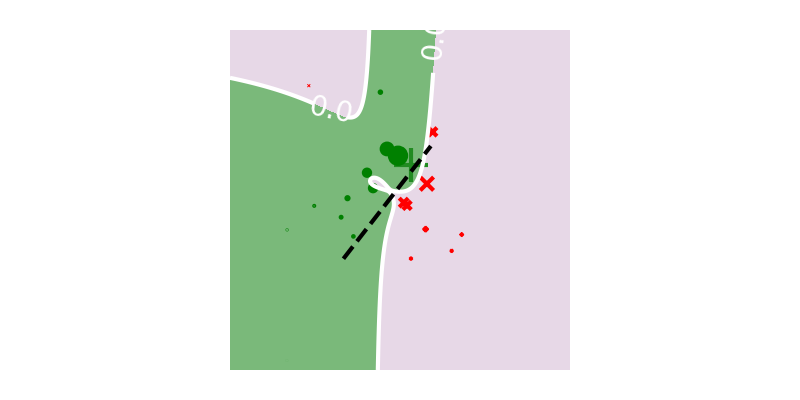

In [17]:
f,ax = get_plot()
scale=100
ax.scatter(xs[zs>0],ys[zs>0],c='red',marker='x',s=scale* sample_weights[zs>0])
ax.scatter(xs[zs<0],ys[zs<0],c='green',marker='o',s=scale* sample_weights[zs<0])

a = -weights[0] / weights[1]
xx = np.linspace(X_train[:, 0].min()*.5, X_train[:, 0].max()*.5)
yy = a * xx - (intercept) / weights[1]

# Plot decision boundary
ax.plot(xx, yy, 'k--')